<a href="https://colab.research.google.com/github/RaedAffes/Supervised-Not-Supervised-Learning/blob/main/Supervised_Not_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supervised Learning


##Perceptron Monocouche


### Porte AND

In [11]:
import numpy as np

class Perceptron:
    def __init__(self):
        self.weight = np.random.rand(2)
        self.bias = np.random.rand(1)

    def activation(self, x):
        return 1 if x > 0 else 0

    def predict(self, inputs):
        weight_sum = np.dot(inputs, self.weight) + self.bias
        output = self.activation(weight_sum)
        return output

    def train(self, training_data, labels, learning_rate, num_epochs):
        for epoch in range(num_epochs):
            for i in range(len(training_data)):
                inputs = training_data[i]
                target = labels[i]
                prediction = self.predict(inputs)
                erreur = target - prediction

                # Mise à jour des poids et du biais
                self.weight += learning_rate * erreur * inputs
                self.bias += learning_rate * erreur

# Données d'entraînement (porte logique AND)
training_data = np.array([[0, 0],
                          [0, 1],
                          [1, 0],
                          [1, 1]])

labels = np.array([0, 0, 0, 1])

# Création et entraînement du perceptron
perceptron = Perceptron()
learning_rate = 0.1
num_epochs = 1000
perceptron.train(training_data, labels, learning_rate, num_epochs)

# Test du perceptron
print("Résultats après entraînement :")
for inputs in training_data:
    prediction = perceptron.predict(inputs)
    print(f"Entrées: {inputs}, Prédiction : {prediction}")

# Calcul de la précision
predictions = np.array([perceptron.predict(x) for x in training_data])
accuracy = np.mean(predictions == labels)
print(f"\nPrécision du modèle : {accuracy * 100:.2f}%")

Résultats après entraînement :
Entrées: [0 0], Prédiction : 0
Entrées: [0 1], Prédiction : 0
Entrées: [1 0], Prédiction : 0
Entrées: [1 1], Prédiction : 1

Précision du modèle : 100.00%


####Porte AND avec sklearn**

In [12]:
from sklearn.metrics import accuracy_score
predictions = [perceptron.predict(x) for x in training_data]
accuracy = accuracy_score(labels, predictions)
print(f"\nPrécision : {accuracy * 100:.2f}%")


Précision : 100.00%


### Porte OR

In [13]:
import numpy as np

class Perceptron:
    def __init__(self):
        self.weight = np.random.rand(2)
        self.bias = np.random.rand(1)

    def activation(self, x):
        return 1 if x > 0 else 0

    def predict(self, inputs):
        weight_sum = np.dot(inputs, self.weight) + self.bias
        output = self.activation(weight_sum)
        return output

    def train(self, training_data, labels, learning_rate, num_epochs):
        for epoch in range(num_epochs):
            for i in range(len(training_data)):
                inputs = training_data[i]
                target = labels[i]
                prediction = self.predict(inputs)
                erreur = target - prediction

                # Mise à jour des poids et du biais
                self.weight += learning_rate * erreur * inputs
                self.bias += learning_rate * erreur

# Données d'entraînement (porte logique AND)
training_data = np.array([[0, 0],
                          [0, 1],
                          [1, 0],
                          [1, 1]])

labels = np.array([0, 1, 1, 1])

# Création et entraînement du perceptron
perceptron = Perceptron()
learning_rate = 0.1
num_epochs = 1000
perceptron.train(training_data, labels, learning_rate, num_epochs)

# Test du perceptron
print("Résultats après entraînement :")
for inputs in training_data:
    prediction = perceptron.predict(inputs)
    print(f"Entrées: {inputs}, Prédiction : {prediction}")

# Calcul de la précision
predictions = np.array([perceptron.predict(x) for x in training_data])
accuracy = np.mean(predictions == labels)
print(f"\nPrécision du modèle : {accuracy * 100:.2f}%")

Résultats après entraînement :
Entrées: [0 0], Prédiction : 0
Entrées: [0 1], Prédiction : 1
Entrées: [1 0], Prédiction : 1
Entrées: [1 1], Prédiction : 1

Précision du modèle : 100.00%


## Perceptrone **Multicouche**

### Porte XOR

In [1]:
import numpy as np

class MLP:
    def __init__(self):
        # 2 neurones cachés
        self.W1 = np.random.randn(2, 2)   # (input → hidden)
        self.b1 = np.random.randn(2)

        # 1 neurone de sortie
        self.W2 = np.random.randn(2)                       # (hidden → output)
        self.b2 = np.random.randn(1)

    def activation(self, x):
        return 1 / (1 + np.exp(-x))                        # Sigmoid

    def activation_deriv(self, x):
        return x * (1 - x)                                 # dérivée du sigmoid

    def predict(self, x):
        h = self.activation(np.dot(x, self.W1) + self.b1)
        y = self.activation(np.dot(h, self.W2) + self.b2)
        return 1 if y > 0.5 else 0

    def train(self, X, y, lr, epochs):
        for _ in range(epochs):
            for i in range(len(X)):
                x = X[i]
                target = y[i]



                h = self.activation(np.dot(x, self.W1) + self.b1)
                output = self.activation(np.dot(h, self.W2) + self.b2)        # Forward pass


                error = target - output
                d_output = error * self.activation_deriv(output)             # Backpropagation


                d_hidden = d_output * self.W2 * self.activation_deriv(h)     # Hidden layer error


                self.W2 += lr * d_output * h
                self.b2 += lr * d_output                                      # Update output weights


                self.W1 += lr * np.outer(x, d_hidden)
                self.b1 += lr * d_hidden                                      # Update hidden weights


training_data = np.array([[0, 0],
                          [0, 1],
                          [1, 0],
                          [1, 1]])

labels = np.array([0, 1, 1, 0])


mlp = MLP()
mlp.train(training_data, labels, lr=0.1, epochs=10000)                    # Entraînement

print("Résultats après entraînement :")
for x in training_data:                                                   # Tests

    print(f"Entrée {x} → prédiction : {mlp.predict(x)}")


predictions = np.array([mlp.predict(x) for x in training_data])
accuracy = np.mean(predictions == labels)
print(f"\nPrécision : {accuracy * 100:.2f}%")                              # Calcul de précision


Résultats après entraînement :
Entrée [0 0] → prédiction : 0
Entrée [0 1] → prédiction : 1
Entrée [1 0] → prédiction : 1
Entrée [1 1] → prédiction : 0

Précision : 100.00%


# Not Supervised Learning

## k-means

In [12]:
from google.colab import files
uploaded = files.upload()

Saving ventes.xls to ventes (1).xls


In [13]:
import pandas as pd
fichier = pd.read_excel('ventes.xls')
print(fichier)

     MT   RG  PRIX  BR  INV  PUB   FV  TPUB  VENTES  Cluster
0   369  118    59   9   17   89  177   225    5439      NaN
1   476  138    71  18    4   63  279   206    5149      NaN
2   432  152    73  16  -50   16  245   309    4704      NaN
3   418  135    79  35  142   74  270    83    5036      NaN
4   383  104    60  21  -45   32  201   298    4110      NaN
5   554  138    81  20   42   93  324   161    6180      NaN
6   320  147    66  15   10   48  154   305    4888      NaN
7   268  129    57  29   89   51  166   263    4290      NaN
8   359  106    69  27   71   74  196   414    5397      NaN
9   461  132    82  27  -18   91  267   170    5272      NaN
10  420  136    70  10    8   91  213   429    4989      NaN
11  536  111    73  27  128   74  296   273    5927      NaN
12  311  143    67  22  -25   27  181    60    4033      NaN
13  517  142    74  27   27   75  307   345    6124      NaN
14  332  140    60  11   61   21  180   247    4708      NaN
15  336  136    60  25  

In [17]:
from sklearn.preprocessing import StandardScaler

fich = fichier.drop(columns=['Cluster'])
scaler=StandardScaler()
X=scaler.fit_transform(fich)
print(X)

[[-0.46782873 -1.09636999 -1.20581546 -1.4253829  -0.29394242  1.23175734
  -0.99148107 -0.27955386  0.64703519]
 [ 0.89945221  0.3285152   0.35380214 -0.25916053 -0.51229964  0.20602347
   1.03339017 -0.4524425   0.16494503]
 [ 0.33720584  1.32593483  0.61373841 -0.51832106 -1.41932195 -1.64818775
   0.35843309  0.48479593 -0.57481402]
 [ 0.15830927  0.11478242  1.39354721  1.94370396  1.80564627  0.6399878
   0.85472506 -1.57166898 -0.0229039 ]
 [-0.28893216 -2.09378963 -1.07584733  0.12958026 -1.33533841 -1.01696691
  -0.51504078  0.38470251 -1.56226767]
 [ 1.89616168  0.3285152   1.65348348  0.          0.12597532  1.38956255
   1.92671571 -0.8619156   1.87885868]
 [-1.09396673  0.96971353 -0.29603853 -0.64790132 -0.41151938 -0.38574607
  -1.44806968  0.44839832 -0.26893612]
 [-1.75843971 -0.31268314 -1.46575173  1.16622237  0.91542067 -0.26739216
  -1.20984953  0.06622343 -1.26303929]
 [-0.595612   -1.95130111  0.09386587  0.90706185  0.6130799   0.6399878
  -0.61429917  1.4402331

In [18]:
X[0]

array([-0.46782873, -1.09636999, -1.20581546, -1.4253829 , -0.29394242,
        1.23175734, -0.99148107, -0.27955386,  0.64703519])

In [24]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0)



Centroïdes = [[ 0.79243372 -0.25924994  0.85742866  0.50212352  0.26874735  0.85203855
   0.83487338  0.04006265  0.76381738]
 [-0.63394698  0.20739996 -0.68594293 -0.40169882 -0.21499788 -0.68163084
  -0.6678987  -0.03205012 -0.6110539 ]]
Labels = [1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1]


In [25]:
kmeans = KMeans(n_clusters=3, random_state=0) # Example: initialize with 3 clusters, or based on an optimal k
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [26]:
print("Centroides = ", kmeans.cluster_centers_)

Centroides =  [[ 1.12520264 -0.05145419  1.09028823  0.73428816  0.33033529  0.81094344
   1.26168447 -0.44940937  0.93905992]
 [-0.65240456  0.35226328 -0.62817931 -0.28795614 -0.20622627 -0.89422953
  -0.63194511 -0.0045497  -0.75084158]
 [-0.2931916  -0.95388148 -0.29603853 -0.6047079  -0.04199177  1.06080169
  -0.62753362  0.91246784  0.37440489]]


In [27]:
print("Labels = ", kmeans.labels_)

Labels =  [2 0 1 0 1 0 1 1 2 0 2 0 1 0 1 1 1 1]


In [28]:
nouveau = np.array([0, 1, 2, 2, 2.5, 5, 1, 0, 4]).reshape(1, -1)
print("Prediction du nouveau point = ", kmeans.predict(nouveau))


Prediction du nouveau point =  [0]


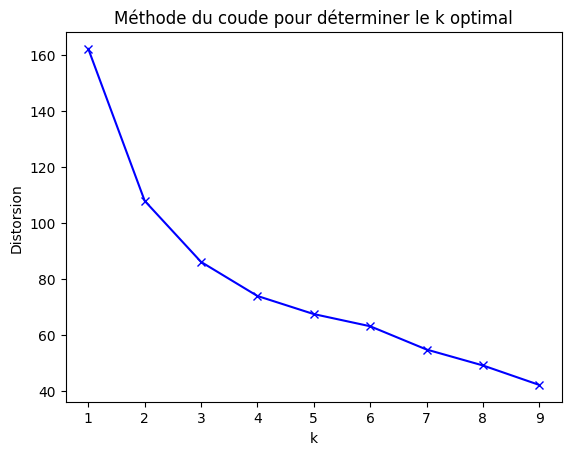

In [29]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsion')
plt.title('Méthode du coude pour déterminer le k optimal')
plt.show()

k = 2, silhouette = 0.5533367599520679
k = 3, silhouette = 0.4791242918017139
k = 4, silhouette = 0.5181298386080173
k = 5, silhouette = 0.488384482678256
k = 6, silhouette = 0.4544733956303238
k = 7, silhouette = 0.39317424607534457
k = 8, silhouette = 0.3357538174634212
k = 9, silhouette = 0.2821011603720004


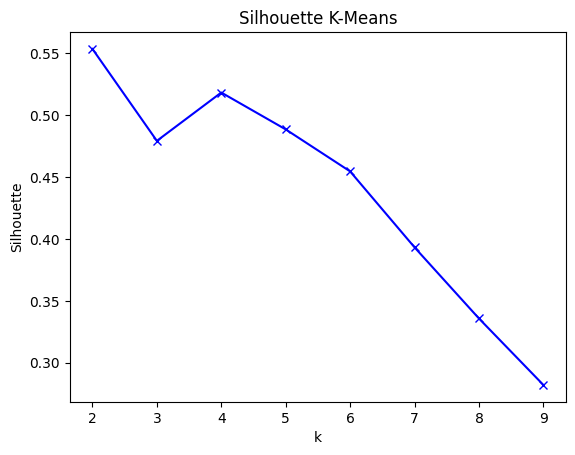

In [30]:
from sklearn.metrics import silhouette_score

L = []

for n_clusters in range(2, 10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(fich)
    score = silhouette_score(fich, preds)
    L.append(score)
    print(f"k = {n_clusters}, silhouette = {score}")

plt.plot(range(2, 10), L, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette K-Means')
plt.show()

In [31]:
k_optimal = 4

Centroides finaux =  [[ 1.12520264 -0.05145419  1.09028823  0.73428816  0.33033529  0.81094344
   1.26168447 -0.44940937  0.93905992]
 [-0.51574746  0.84503608 -0.62095886 -1.06903718  0.51649882 -0.79998475
  -0.78303844  0.03665037 -0.24109126]
 [-0.2931916  -0.95388148 -0.29603853 -0.6047079  -0.04199177  1.06080169
  -0.62753362  0.91246784  0.37440489]
 [-0.76173024 -0.04195495 -0.63395567  0.33690869 -0.78440633 -0.96962535
  -0.51107044 -0.03750976 -1.15864183]]
Labels finaux =  [2 0 3 0 3 0 1 3 2 0 2 0 3 0 1 3 1 1]


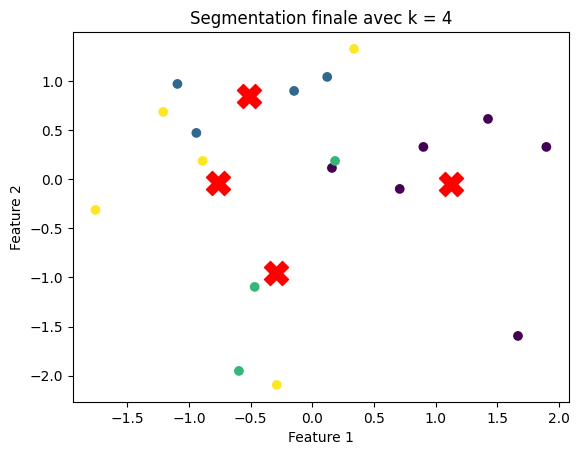

In [32]:
kmeans = KMeans(n_clusters=k_optimal, random_state=0)
labels = kmeans.fit_predict(X)


print("Centroides finaux = ", kmeans.cluster_centers_)


print("Labels finaux = ", labels)


plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X')
plt.title(f'Segmentation finale avec k = {k_optimal}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()